In [144]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier  # Import XGBoost classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pprint 



In [145]:
pp = pprint.PrettyPrinter(indent=4)

In [146]:

data = pd.read_csv('./DATA/data.csv')
df = pd.DataFrame(data)
# Assuming 'data' is your DataFrame and 'signal' is the target variable
X = data.drop(['signal', 'datetime'], axis=1)  # Exclude 'datetime' for model training
y = data['signal'].map({'buy': 0, 'sell': 1, 'none': 2}).astype(int)  # Encoding signals
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [147]:

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize XGBoost classifier
xgb_classifier = XGBClassifier()

# Train the classifier
xgb_classifier.fit(X_train_scaled, y_train)


# Predict signals on the test set
y_pred = xgb_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate class accuracy, f1 score, and confusion matrix
class_accuracy = classification_report(y_test, y_pred, output_dict=True)
confusion_mat = confusion_matrix(y_test, y_pred)

# Print the results
print("Class Accuracy:")
pp.pprint(class_accuracy)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.7967914438502673
Class Accuracy:
{   '0': {   'f1-score': 0.16666666666666669,
             'precision': 0.5,
             'recall': 0.1,
             'support': 20.0},
    '1': {   'f1-score': 0.25,
             'precision': 0.6,
             'recall': 0.15789473684210525,
             'support': 19.0},
    '2': {   'f1-score': 0.8834355828220859,
             'precision': 0.8089887640449438,
             'recall': 0.972972972972973,
             'support': 148.0},
    'accuracy': 0.7967914438502673,
    'macro avg': {   'f1-score': 0.4333674164962509,
                     'precision': 0.6363295880149813,
                     'recall': 0.4102892366050261,
                     'support': 187.0},
    'weighted avg': {   'f1-score': 0.7424160405935939,
                        'precision': 0.7547076849125758,
                        'recall': 0.7967914438502673,
                        'support': 187.0}}
Confusion Matrix:
[[  2   0  18]
 [  0   3  16]
 [  2   2 144]]


In [148]:

# Initialize XGBoost classifier with class weights
classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=y_train
)
xgb_classifier = XGBClassifier()

# Train the classifier
xgb_classifier.fit(X_train_scaled, y_train, sample_weight=classes_weights)

# Predict signals on the test set
y_pred = xgb_classifier.predict(X_test_scaled)

#Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate class accuracy, f1 score, and confusion matrix
class_accuracy = classification_report(y_test, y_pred, output_dict=True)
confusion_mat = confusion_matrix(y_test, y_pred)

# Print the results
print("Class Accuracy:")
pp.pprint(class_accuracy)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.7593582887700535
Class Accuracy:
{   '0': {   'f1-score': 0.13793103448275865,
             'precision': 0.2222222222222222,
             'recall': 0.1,
             'support': 20.0},
    '1': {   'f1-score': 0.3333333333333333,
             'precision': 0.45454545454545453,
             'recall': 0.2631578947368421,
             'support': 19.0},
    '2': {   'f1-score': 0.8571428571428572,
             'precision': 0.8083832335329342,
             'recall': 0.9121621621621622,
             'support': 148.0},
    'accuracy': 0.7593582887700535,
    'macro avg': {   'f1-score': 0.44280240831964973,
                     'precision': 0.49505030343353695,
                     'recall': 0.42510668563300147,
                     'support': 187.0},
    'weighted avg': {   'f1-score': 0.7270005180755689,
                        'precision': 0.7097407841908145,
                        'recall': 0.7593582887700535,
                        'support': 187.0}}
Confusion Matrix:
[[  2  

In [149]:
# Define class weights
class_weights_custom = {0: 10, 1: 10, 2: 1}

xgb_classifier = XGBClassifier()

# Initialize XGBoost classifier with class weights
classes_weights = class_weight.compute_sample_weight(
    class_weight=class_weights_custom,
    y=y_train
)
# Train the classifier
xgb_classifier.fit(X_train_scaled, y_train, sample_weight=classes_weights)

# Predict signals on the test set
y_pred = xgb_classifier.predict(X_test_scaled)

#Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate class accuracy, f1 score, and confusion matrix
class_accuracy = classification_report(y_test, y_pred, output_dict=True)
confusion_mat = confusion_matrix(y_test, y_pred)

# Print the results
print("Class Accuracy:")
pp.pprint(class_accuracy)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.7914438502673797
Class Accuracy:
{   '0': {   'f1-score': 0.26666666666666666,
             'precision': 0.4,
             'recall': 0.2,
             'support': 20.0},
    '1': {   'f1-score': 0.4516129032258065,
             'precision': 0.5833333333333334,
             'recall': 0.3684210526315789,
             'support': 19.0},
    '2': {   'f1-score': 0.8753993610223642,
             'precision': 0.8303030303030303,
             'recall': 0.9256756756756757,
             'support': 148.0},
    'accuracy': 0.7914438502673797,
    'macro avg': {   'f1-score': 0.5312263103049458,
                     'precision': 0.6045454545454546,
                     'recall': 0.49803224276908487,
                     'support': 187.0},
    'weighted avg': {   'f1-score': 0.7672357429194306,
                        'precision': 0.7591881380651434,
                        'recall': 0.7914438502673797,
                        'support': 187.0}}
Confusion Matrix:
[[  4   0  16]
 [  0   7 

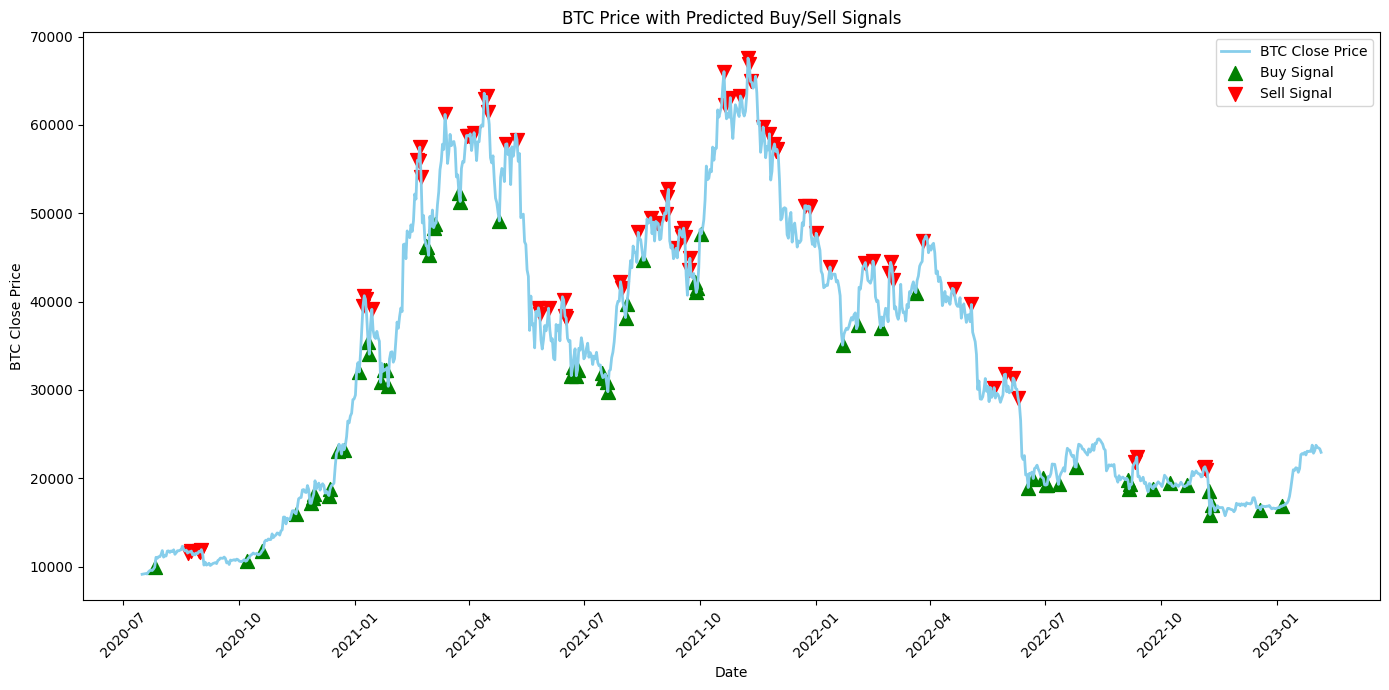

In [150]:

import matplotlib.pyplot as plt
import pandas as pd

# Ensure datetime is in the correct format
df['datetime'] = pd.to_datetime(df['datetime'])
X_scaled = scaler.fit_transform(X)
df['predicted_signal'] =  xgb_classifier.predict(X_scaled)
plt.figure(figsize=(14, 7))
plt.plot(df['datetime'], df['close'], label='BTC Close Price', color='skyblue', linewidth=2)

# Adjust the conditions to match the labels
# Highlight buy signals
buy_signals = df[df['predicted_signal'] == 0]  # Assuming 0 represents 'buy'
plt.scatter(buy_signals['datetime'], buy_signals['close'], label='Buy Signal', marker='^', color='green', alpha=1, s=100)

# Highlight sell signals
sell_signals = df[df['predicted_signal'] == 1]  # Assuming 1 represents 'sell'
plt.scatter(sell_signals['datetime'], sell_signals['close'], label='Sell Signal', marker='v', color='red', alpha=1, s=100)

plt.title('BTC Price with Predicted Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('BTC Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("AfterClassBalancing")
plt.show()